<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/handson-ml2/blob/master/Chapter2EX_Second_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios do Capítulo 2 do livro de Aurélien

Refarei todo a análise dos dados de maneira mais clara. Irei tbm comparar e ir atrás das soluções de Aurélien. Let's do it!

## First look at the data

A primeira coisa a se fazer, quando se tem os dados em mãos, é fazer uma rápida exploração afim de se saber a 'cara' dos dados ... 

In [1]:
import requests

url = 'https://raw.githubusercontent.com/JoaoSiqueiraDS/handson-ml2/master/datasets/housing/housing.csv'
response = requests.get(url)

if response.status_code == 200:
  with open('housing.csv', 'w') as f:
      f.write(response.content.decode('utf-8'))
else:
  print(f'Failed to retrieve data from {url}')





In [2]:
import pandas as pd

housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


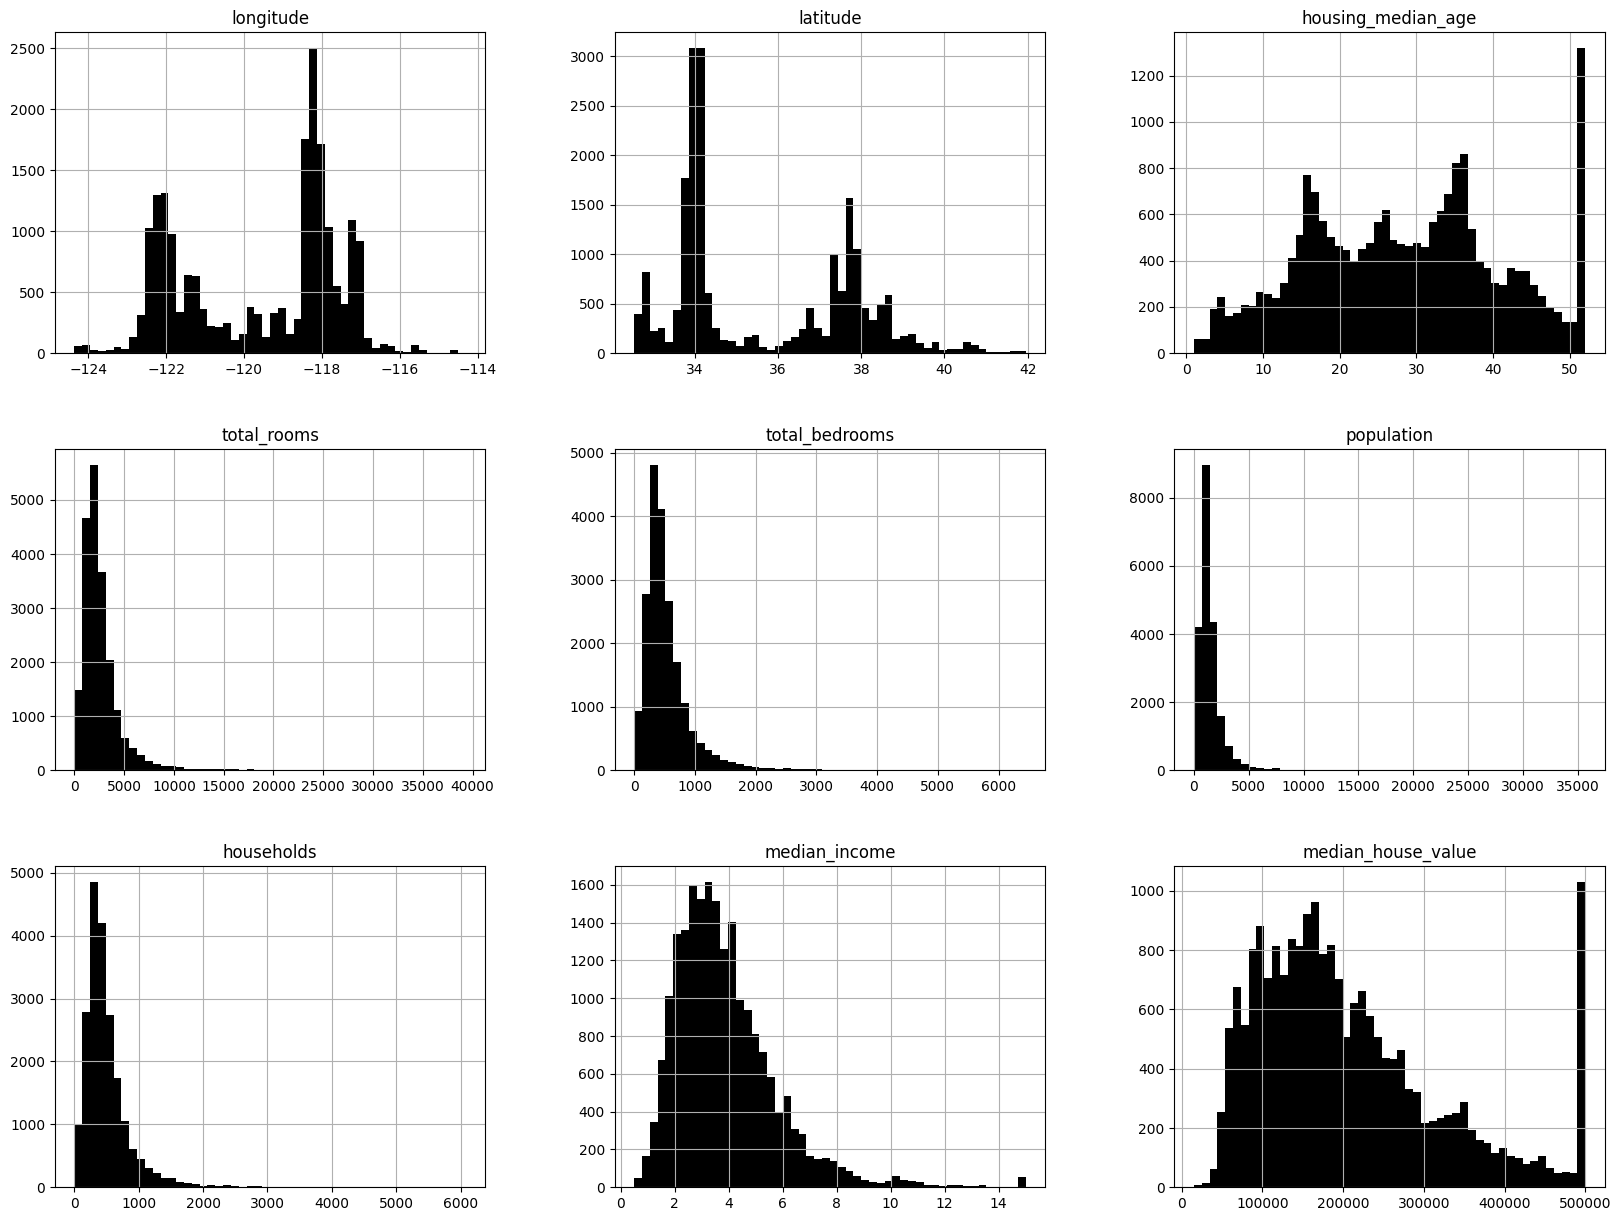

In [7]:
import matplotlib.pyplot as plt
import numpy as np

housing.hist(bins=50, figsize=(20,15), color='k')
plt.show()

## Create a Test Set

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratifying the train and test sets

For small datasets, such as this one, stratifying is quite interesting and can bring more accuracy to our project

In [9]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

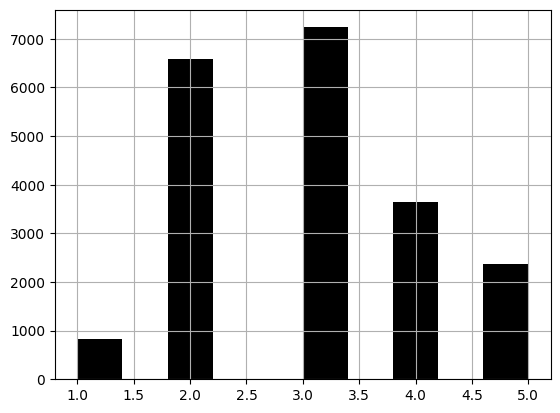

In [10]:
housing['income_cat'].hist(color='k')

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit 

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
# Dropping the 'income_cat' column

for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

## Discover and visualize the data to gain insights

In [14]:
# Copying the strat_train_set

housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

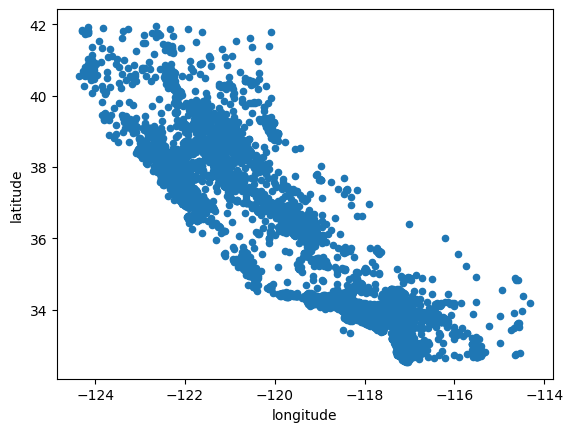

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

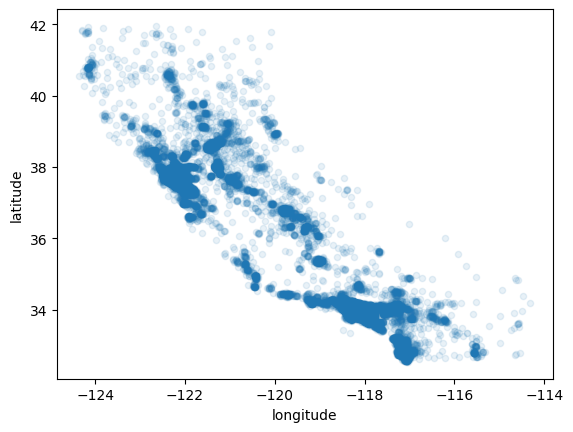

In [16]:
# Better visualization

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

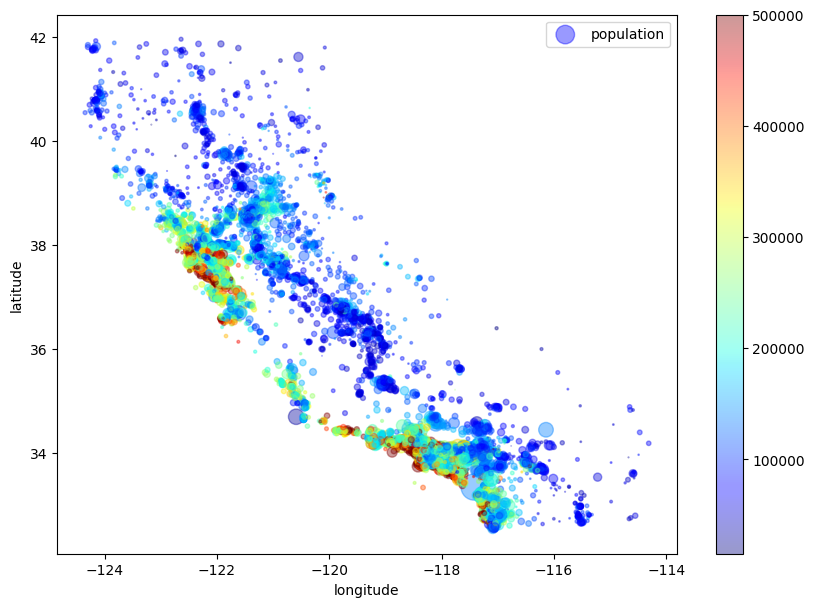

In [17]:
# An even better visualization

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,7),
             c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## Looking for correlations


In [18]:
corr_matrix = housing.corr()

<ipython-input-18-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

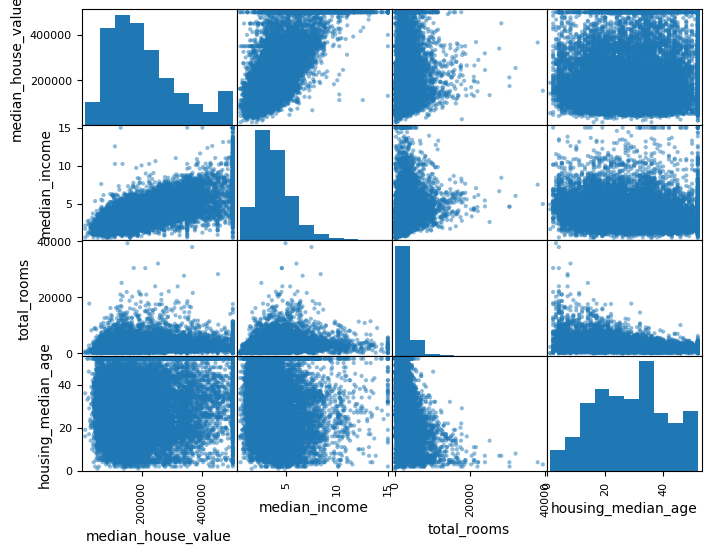

In [20]:
# Another way to find correlation

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(8,6))

<Axes: xlabel='median_income', ylabel='median_house_value'>

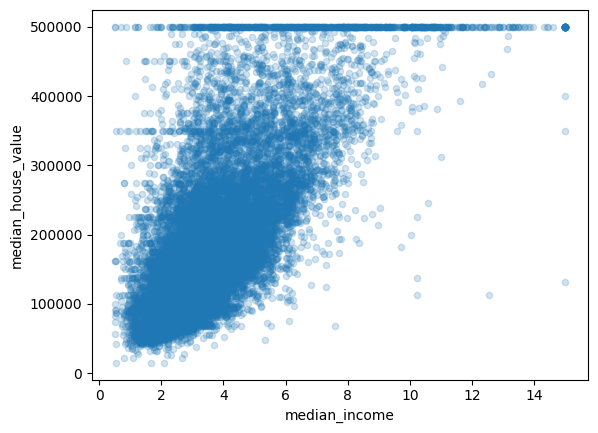

In [21]:
# median income seems to be a promising attribute

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

### Creating new attributes



In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-23-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Preparing the data for the ML algorithm


In [24]:
# the first thing is to create datasets for predictors and labels

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [25]:
# The feature 'total_bedrooms' presents some missing values. We can get rid of the instances, 
# of the entire column or replace the values by a specific value (zero, median, etc)
# Let's use a SK learn class to replace the values by a medin. This technique is not the only one to solve this problem but
# but it is certainly the most classy one.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [26]:
# Since the median cannot be computed for categorical values, we need to separate them

housing_num = housing.drop('ocean_proximity', axis=1)

In [27]:
# fitting the imputer instance to the training data

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
X = imputer.transform(housing_num)

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [30]:
# Handling categorical attributes

housing_cat = housing[['ocean_proximity']]

In [31]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [32]:
# Most ML algorithm prefer working with numbers and therefore it is needed to transform the 
# categorical valeus into numbers. Again, we use a handy SK learn class to achieve it

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(housing_cat)


OrdinalEncoder()

In [33]:
housing_cat_encoded = ordinal_encoder.transform(housing_cat)


In [34]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
# Using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder.fit(housing_cat)
housing_cat_1hot = cat_encoder.transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
# Creating custom transformers

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__ (self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Data Scaler and Pipelines

In [39]:
# Creating a pipeline for the numerical data and applying scaling the data
# It is important to fit the StandardScaler to the training data before scaling the whole dataset (including the test dataset)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
# Creating a pipeline treat the entire dataset

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and train a model

We have done a lot to get to this point ... Before selecting and train our ML model, let's take a look at a simple model with some data.

In [41]:
# Training a linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [42]:
# Done! We have trainned the model. Let's predict some instances

# Getting some data
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

# Preparing some data
some_data_prepared = full_pipeline.transform(some_data)

# Printing the predictions
print('Predictions:', lin_reg.predict(some_data_prepared))

# Printing the labels
print('Labels:', list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [43]:
# Measuring the accuracy

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

This value of 68627 does not represent a good error since the district's median_housing_values range from 120 to 264. Probably the model was underfited. Let's try a more complex model. 

In [44]:
# Training a DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better evaluation using cross validation

One way of evaluating the model would be splitting the current training set into a smaller training and validation set. Then, we would train the models against these sets and evaluate them. That is not so complicated but SK learn presents a great alternative: the k-fold cross validation. 
The cross validation score has the advaantage of training several times de models and then we can a mean value of the scores. 

In [ ]:
cross_val_score,
# Cross validation evaluation

from sklearn.model_selection import cross_val_score

scores = cross_val_score()